In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(['ls', '../../Data']).decode('utf8'))

SAP.csv
SAP_normal.csv
SAP_numeric.csv



In [3]:
df = pd.read_csv('../../Data/SAP.csv')
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

df['Gender'][df['Gender'] == "F"] = 0
df['Gender'][df['Gender'] == "M"] = 1
df['Gender'] = df['Gender'].astype(int)

df["Class"][df["Class"] == "L"] = 0
df["Class"][df["Class"] == "M"] = 1
df["Class"][df["Class"] == "H"] = 2
df['Class'] = df['Class'].astype(int)

df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Good"] = 0
df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Bad"] = 1
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].astype(int)

df['Relation'][df['Relation'] == "Father"] = 0
df['Relation'][df['Relation'] == "Mum"] = 1
df['Relation'] = df['Relation'].astype(int)

df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Under-7"] = 0
df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Above-7"] = 1
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].astype(int)

df.head()

/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/galiold/Projects/University/Datamining-Fall2019/FirstPhase/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,15,16,2,20,Yes,0,0,1
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,20,20,3,25,Yes,0,0,1
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,10,7,0,30,No,1,1,0
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,30,25,5,35,No,1,1,0
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,40,50,12,50,No,1,1,1


In [4]:
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = df.sample(frac=0.7, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]

print(train.shape)
print(test.shape)

(336, 17)
(144, 17)


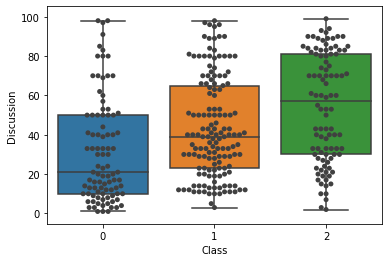

In [5]:
ax = sns.boxplot(x='Class', y='Discussion', data=train)
ax = sns.swarmplot(x='Class', y = 'Discussion', data=train, color='.25')
plt.show()

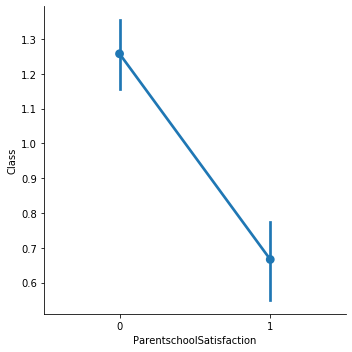

In [6]:
sns.catplot('ParentschoolSatisfaction','Class', kind='point', data=train) 

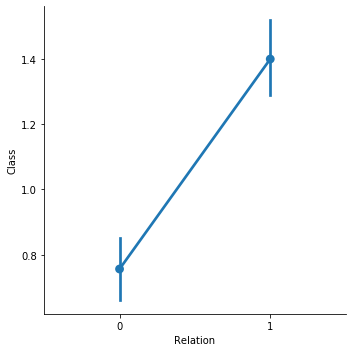

In [7]:
sns.catplot('Relation','Class', kind='point', data=train) 

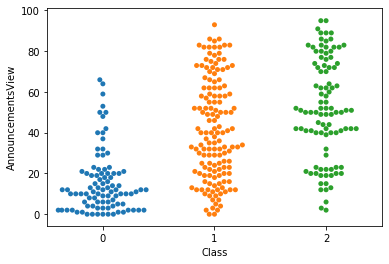

In [8]:
sns.swarmplot(x='Class', y='AnnouncementsView', data=train)

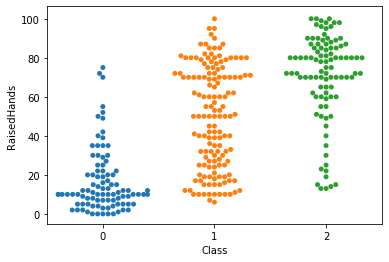

In [9]:
Raised_hand = sns.swarmplot(x="Class", y="RaisedHands", data=train)

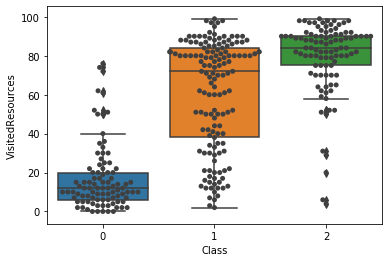

In [10]:
ax = sns.boxplot(x='Class', y='VisitedResources', data=train)
ax = sns.swarmplot(x='Class', y = 'VisitedResources', data=train, color='.25')
plt.show()

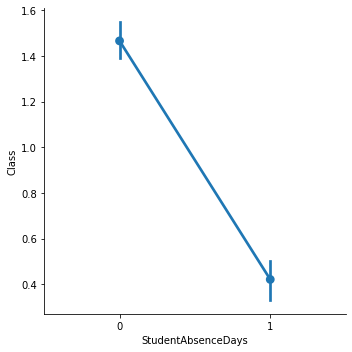

In [11]:
sns.catplot('StudentAbsenceDays','Class', kind='point', data=train) 

In [12]:
from sklearn import tree
target = train['Class'].values
features = train[["Gender", "Discussion", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values
tree_clsfr_ovrfit = tree.DecisionTreeClassifier()
tree_clsfr_ovrfit = tree_clsfr_ovrfit.fit(features, target)

print(tree_clsfr_ovrfit.feature_importances_)
print(tree_clsfr_ovrfit.score(features, target))

[0.03225923 0.13822279 0.00999301 0.05858068 0.15587624 0.10549604
 0.34475632 0.15481568]
0.9970238095238095


In [17]:
tree_clsfr = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
tree_clsfr = tree_clsfr.fit(features, target)

print(tree_clsfr.feature_importances_)
print(tree_clsfr.score(features, target))

[0.02626268 0.12708459 0.00429905 0.05813933 0.12630897 0.1284377
 0.3579155  0.17155217]
0.9494047619047619


In [23]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my forest
rnd_forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
rnd_forest = rnd_forest.fit(features, target)

print(rnd_forest.feature_importances_)

# Print the score of the fitted random forest
print(rnd_forest.score(features, target))

[0.03053702 0.13127372 0.03702121 0.05964839 0.16759201 0.20375237
 0.2302208  0.13995448]
0.9970238095238095


In [21]:
test_features = train[["Gender", "Discussion", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values
prediction = tree_clsfr.predict(test_features)
solution = pd.DataFrame(prediction, columns = ["Class"])
solution

,Class
0,2
1,2
2,0
3,0
4,2
...,...
331,1
332,0
333,2
334,2
